In [1]:
import numpy as np
import pandas as pd
from PIL import Image

In [2]:
#형태소분석

#반드시 설치!
import re
#!pip install konlpy
import konlpy

from collections import Counter  #없으면 설치해주세요!

#워드클라우드 환경설정
#없으면 설치해주세요!
#!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from os import path
#imread(r뒤에 원하는 이미지 사진 위치 넣어주시면 돼요!, 도지말고 다른거로 해야하나? 뭐로 해야센스있을지 고민이네용! 유튜브 로고 모양!
import requests 
from wordcloud import ImageColorGenerator

#NanumBarunGothic체 파일을 드라이브에 저장해주시고 꼭 글씨체 위치를 지정해주셔야합니다!
#한국어가 지원되는 폰트로 지정해주세요! 저 같은 경우는 나눔바른고딕을 사용하였습니다.
FONT_PATH = 'C:/Users/Shon/Documents/R/win-library/4.1/rmarkdown/rmd/h/bootstrap/css/fonts/NanumBarunGothic.ttf'

In [3]:
from ckonlpy.tag import Twitter #customize  konlpy
twitter = Twitter()

C:\Users\Shon\anaconda3\lib\site-packages\konlpy\tag\_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [4]:
twitter.add_dictionary(['오징어게임', '무한도전', '문명특급','유퀴즈','놀면뭐하니','쿠팡플레이','출장십오야','채널십오야','여자아이들','오마이걸','르세라핌',
                       '브이로그','불후의명곡','레드벨벳','킬링보이스','에스파','싱어게인','투모로우바이투게더','볼빨간사춘기','엔시티','(여자)아이들',
                       '기시니스릴러툰','짐승친구들','선공개','스우파','짤툰프리미엄','사이다툰','가짜사나이','빅마마','킬링벌스','동상이몽','아이유'], 'Noun')


In [5]:
df = pd.read_csv("C:/Users/Shon/Desktop/연세대학교/DSL/EDA/youtube_nodouble_unique.csv",lineterminator='\n')

In [6]:
df['trending_date']=pd.to_datetime(df['trending_date'])

In [7]:
df['trending_date'].dt.year

0        2020
1        2020
2        2020
3        2020
4        2020
         ... 
16923    2022
16924    2022
16925    2022
16926    2022
16927    2022
Name: trending_date, Length: 16928, dtype: int64

In [11]:
df_2022 = df[df['trending_date'].dt.year==2022]
df_2022['category_name'].value_counts(normalize=True) 

Entertainment            0.345490
People & Blogs           0.170527
Music                    0.115328
Sports                   0.086003
Comedy                   0.065303
Gaming                   0.047314
Howto & Style            0.041646
News & Politics          0.035978
Film & Animation         0.026368
Travel & Events          0.020207
Pets & Animals           0.015771
Education                0.010843
Autos & Vehicles         0.008871
Science & Technology     0.008132
Nonprofits & Activism    0.002218
Name: category_name, dtype: float64

In [12]:
df_2021 = df[df['trending_date'].dt.year==2021]
df_2021['category_name'].value_counts(normalize=True) 

Entertainment            0.361540
People & Blogs           0.156329
Music                    0.102260
Sports                   0.079663
Comedy                   0.060065
News & Politics          0.051764
Howto & Style            0.042310
Gaming                   0.031473
Film & Animation         0.029629
Education                0.020636
Pets & Animals           0.019829
Science & Technology     0.017524
Travel & Events          0.013489
Autos & Vehicles         0.011759
Nonprofits & Activism    0.001729
Name: category_name, dtype: float64

In [13]:
df_2020 = df[df['trending_date'].dt.year==2020]
df_2020['category_name'].value_counts(normalize=True) 

Entertainment            0.305291
News & Politics          0.121306
People & Blogs           0.114395
Music                    0.112965
Sports                   0.090562
Comedy                   0.047188
Film & Animation         0.045996
Gaming                   0.040515
Education                0.027645
Science & Technology     0.025500
Howto & Style            0.025500
Pets & Animals           0.020496
Autos & Vehicles         0.016206
Travel & Events          0.004528
Nonprofits & Activism    0.001907
Name: category_name, dtype: float64

In [9]:
df_2022.sort_values(by='trending_date',ascending=True)

,video_id,title,publishedAt,channelId,channelTitle,trending_date,tags,view_count,likes,dislikes,comment_count,description,category_name,tag_num,period,Unnamed: 0,comments_disabled,ratings_disabled
12923,_PxoNWb--uk,우리집 강아지가 임신을 했어요!,2021-12-22 03:01:15,UC-IYpdOqjkER7B6cnChwlhA,소녀의행성 Girlsplanet,2022-01-01,pomeranian|welshcorgi|retriever|dog|puppy|소녀의행...,1107127,31096,0,1542,#소녀의행성 #강아지 #dog유기견이 된 별이가 따뜻한 곳에서 출산을 할 수 있도록...,Pets & Animals,42,11,99285.0,False,False
12894,V9OalDoXnN8,현재 동해안 최고의 이슈!!! 물고기 떼가 들어왔다 / Let's take out...,2021-12-19 01:01:29,UCdkCZUpTKqkjm1lXHeP8hnw,리얼깽TV RealkkaengTV,2022-01-01,[None],358713,8907,0,616,요즘 동해안의 뜨거운 감자!바로바로~ 도루묵!!!!!도루묵을 잡으려고 통발을 쳐놓고...,Entertainment,0,13,99338.0,False,False
12871,0rgtmJdMg88,"우크라이나 국경에 러시아 10만병력 집결, 왜? (KBS_243회_2021.12.1...",2021-12-18 15:31:44,UC-0C8yVGJy-cS4FGlYKelWw,세계는지금,2022-01-01,특파원보고 세계는 지금|세계는 지금|국제시사|토네이도|지구온난화|켄터키|양초공장|중...,764233,9332,0,942,#특파원보고세계는지금 #세계는지금 #국제시사특파원 보고 세계는 지금 (매주 토요일 ...,News & Politics,22,13,99293.0,False,False
12858,R8jLFIxVeyo,[방과후 설렘 4화] '아이키쌤'까지 울린 1학년 탈락식_선공개,2021-12-19 00:00:06,UCs8_lfCfIrbEv4Z2_E7zaqQ,방과후 설렘,2022-01-01,방과후설렘|아이키|탈락식,778576,10203,0,783,[방과후 설렘 4화] '아이키쌤'까지 울린 1학년 탈락식_선공개💕방과후 설렘 매주 ...,Entertainment,3,12,99337.0,False,False
12925,0xTBMfJoqEc,[＃주간급상승] 조실장 당신 두 번 다시 내 눈앞에 나타나지 마! 박단단...너 지...,2021-12-21 06:56:32,UChpjIaEgwtDZtmWEkzFulSA,KBS Drama,2022-01-01,주말드라마|아가씨|신사|지현우|이세희|강은탁|박하나|안우연|윤진이|김영옥|차화연|이...,359660,3610,0,360,[＃주간급상승] 조실장 당신 두 번 다시 내 눈앞에 나타나지 마! 박단단...너 지...,Entertainment,13,10,99284.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16786,FqUU8Ek8baM,"나홀로, 폭우중 숲 속에서 차박 캠핑 | 장마철 우중 솔로 캠핑 | 자작캠핑카",2022-07-03 10:17:54,UCbaU6-0RF7FCbNfJtkkbagw,캠핑쥐campingG,2022-07-11,[None],249524,5229,0,332,#우중차박 #차박캠핑 #솔로캠핑 *모든 영상 촬영 및 편집을 혼자 하는 1인 크리에...,Travel & Events,0,8,137472.0,False,False
16787,4TtRn9v_Pgs,"임신한 아내와 아기 키울 월세집 구하는 직장인 신혼부부, 경기도에 사 둔 아파트가 ...",2022-07-03 09:00:02,UC1EEpE0lA9BaArXhRTHIG6w,강과장,2022-07-11,강과장|브이로그|VLOG|자취|자취요리|직장인브이로그|자취브이로그|재테크|투자|경제...,290392,5408,0,613,"알밤이 키울 집을 우여곡절 끝에 구했네요월세가 조금 부담되긴하지만, 저희는 둘다 집...",Howto & Style,27,8,137490.0,False,False
16788,TVSSjMBPGIg,NCT 127 엔시티 127 '영웅 (英雄; Kick It)' Camerawork ...,2022-07-01 11:00:18,UC473RoZQE2gtgZJ61ZW0ZDQ,SMP FLOOR,2022-07-11,SMP|SMP FLOOR|SM Performance|SM Dance|choreogr...,3190996,221831,0,4307,뿌꾸뿌꾸 빠웅빠웅 카메라워크 빠웅빠웅🎧 http://nct127.lnk.to/neo...,People & Blogs,19,8,137491.0,False,False
16791,lHfqIwp8MQE,커플 싸움 직관,2022-07-04 03:55:16,UCXEKwWflysXu312NmIP_dlw,너덜트,2022-07-11,너덜트|카페|커플싸움|연인싸움|직관,2718616,49066,0,2544,#코믹숏무비 #nerdult #싸움구경참을 수 없는 강 건너 불구경여자친구 역 / ...,Comedy,5,7,137420.0,False,False


In [10]:
## All 트렌드 키워드


#titles을 모두 한 리스트에 담는 과정입니다.
titles=[]

#reset_index를 하는 이유는, for문을 돌리기 위해서입니다!
df = df.reset_index()


for i in range (0,len(df)):
    titles.append(df['title'][i]) #요소를 하나하나씩 list에 담습니다!
    
# 뒤에서 진행할 형태소 분석을 위해 리스트를 해제해줍니다!
titles = "".join(titles)

#okt = konlpy.tag.Okt() #형태소 분석기 호출
titles_pos = twitter.pos(titles) #문자열을 형태소 분석기에 넣기

# 보통은 명사, 형용사, 동사가 많은 의미를 담고 있으니
# 명사, 형용사, 동사에 해당하는 word들만 빼내는 과정을 거칩니다.

titles_f = list([word for word, pos in titles_pos if (pos=='Noun')|(pos=='Verb')|(pos=='Adjective')])

#위에를 보니까 정말 많이 등장하지만 별로 필요없는 단어들이 보입니다

#단어가 필요없는 거는 stop_words에 넣어주고, 이미 위에서 한자리단어는 필요없으니 len(word)==1이면 제거해주는 코드를 사용합니다!
stop_words = ['합니다','해주세요','한다','입니다','하는','하니','하면서','이렇게나','있으면','했습니다','봤습니다','까지','어요','다가','부터','까지','들의']
unique_title = set(titles_f) #중복되는 단어들을 없앤 버전이 unique_title입니다.

for word in unique_title:
    if word in stop_words or len(word) == 1:
        while word in titles_f:
            titles_f.remove(word) #stop_words에 해당되거나 한 자리 숫자의 단어를 titles_f에서 제거
            
#Counter 작동! - Counter는 빈도를 세어줍니다.

#빈도 분석을 한 것은 c에 담습니다!
All = Counter(titles_f)


# 드디어 워드클라우드를 생성해보아요!
icon = Image.open('C:/Users/Shon/Desktop/연세대학교/DSL/EDA/youtube-removebg-preview.png')    # 마스크가 될 이미지 불러오기
#plt.imshow(icon)

mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)


wordcloud1 = WordCloud(
    font_path=FONT_PATH,
    background_color='white',                                #사이즈설정
    max_words=200,                                         #단어갯수
    mask=mask,
    colormap="Reds", #킵 autumn
    #background_color="white",
    random_state=1,
    scale=3
)



wordcloud1.generate_from_frequencies(All)
wordcloud1.to_image()


KeyboardInterrupt: 

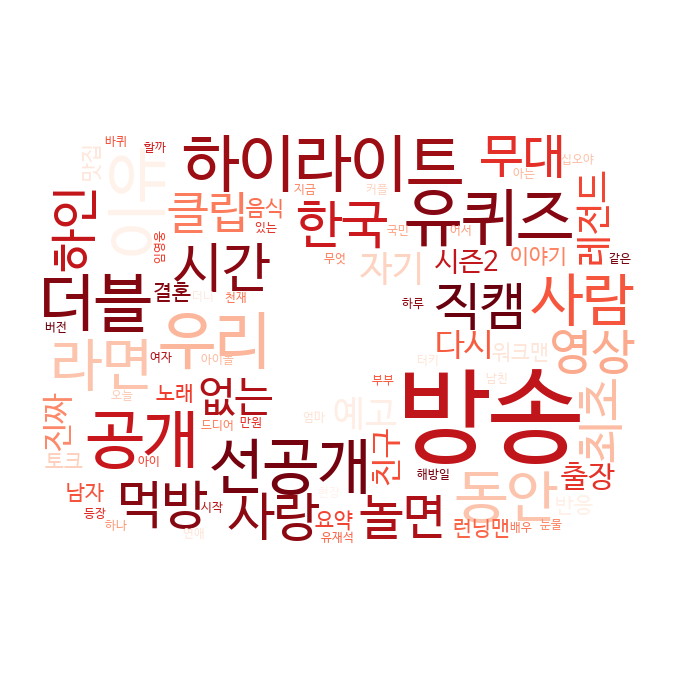

In [212]:
## Entertainment 2022 트렌드 키워드


#titles을 모두 한 리스트에 담는 과정입니다.
titles=[]

#reset_index를 하는 이유는, for문을 돌리기 위해서입니다!
df_Entertainment_2022 = df_2022[df_2022['category_name']=='Entertainment'].reset_index()


for i in range (0,len(df_Entertainment_2022)):
    titles.append(df_Entertainment_2022['title'][i]) #요소를 하나하나씩 list에 담습니다!
    
# 뒤에서 진행할 형태소 분석을 위해 리스트를 해제해줍니다!
titles = "".join(titles)

#okt = konlpy.tag.Okt() #형태소 분석기 호출
titles_pos = twitter.pos(titles) #문자열을 형태소 분석기에 넣기

# 보통은 명사, 형용사, 동사가 많은 의미를 담고 있으니
# 명사, 형용사, 동사에 해당하는 word들만 빼내는 과정을 거칩니다.

titles_f = list([word for word, pos in titles_pos if (pos=='Noun')|(pos=='Verb')|(pos=='Adjective')])

#위에를 보니까 정말 많이 등장하지만 별로 필요없는 단어들이 보입니다

#단어가 필요없는 거는 stop_words에 넣어주고, 이미 위에서 한자리단어는 필요없으니 len(word)==1이면 제거해주는 코드를 사용합니다!
stop_words = ['합니다','해주세요','한다','입니다','하는','하니','하면서','이렇게나','있으면','했습니다','봤습니다','까지','어요','다가','부터','까지','들의']
unique_title = set(titles_f) #중복되는 단어들을 없앤 버전이 unique_title입니다.

for word in unique_title:
    if word in stop_words or len(word) == 1:
        while word in titles_f:
            titles_f.remove(word) #stop_words에 해당되거나 한 자리 숫자의 단어를 titles_f에서 제거
            
#Counter 작동! - Counter는 빈도를 세어줍니다.

#빈도 분석을 한 것은 c에 담습니다!
Entertainment_2022 = Counter(titles_f)


# 드디어 워드클라우드를 생성해보아요!
icon = Image.open('C:/Users/Shon/Desktop/연세대학교/DSL/EDA/youtube-removebg-preview.png')    # 마스크가 될 이미지 불러오기
#plt.imshow(icon)

mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)


wordcloud1 = WordCloud(
    font_path=FONT_PATH,
    background_color='white',                                #사이즈설정
    max_words=200,                                         #단어갯수
    mask=mask,
    colormap="Reds", #킵 autumn
    #background_color="white",
    random_state=1,
    scale=3
)



wordcloud1.generate_from_frequencies(Entertainment_2022)
wordcloud1.to_image()


In [213]:
#막대그래프로 빈도 쉽게 봅시다!!!!
tot_title=pd.DataFrame({
    "word":titles_f
})
tot_title['count']=1
tot_title=tot_title.groupby(by=['word'],as_index=False).count()
tot_title=tot_title.sort_values(by='count',ascending=False).head(30)
tot_title

,word,count
1629,방송,219
4349,하이라이트,52
241,공개,51
2979,우리,49
864,더블,49
3062,유퀴즈,47
3184,이유,47
2115,선공개,41
934,동안,35
1964,사람,34


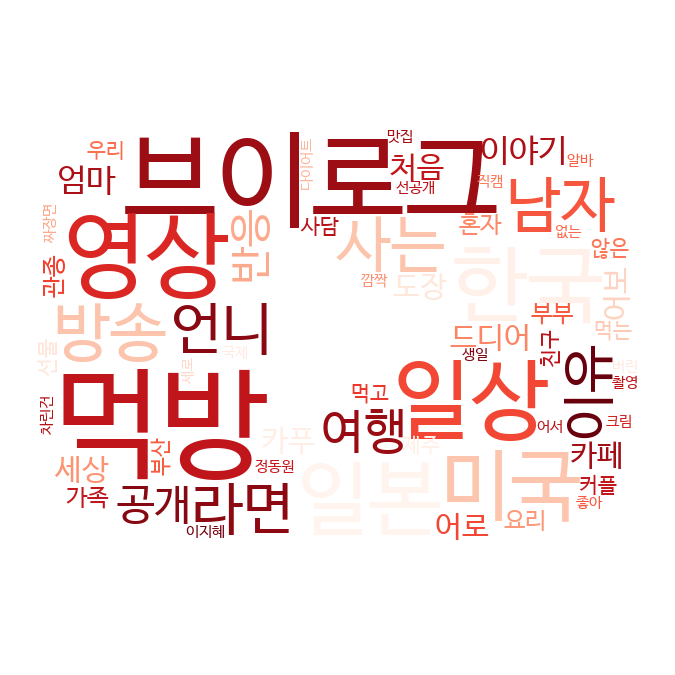

In [214]:
## People & Blogs 2022 트렌드 키워드


#titles을 모두 한 리스트에 담는 과정입니다.
titles=[]

#reset_index를 하는 이유는, for문을 돌리기 위해서입니다!
df_PeopleBlogst_2022 = df_2022[df_2022['category_name']=='People & Blogs'].reset_index()


for i in range (0,len(df_PeopleBlogst_2022)):
    titles.append(df_PeopleBlogst_2022['title'][i]) #요소를 하나하나씩 list에 담습니다!
    
# 뒤에서 진행할 형태소 분석을 위해 리스트를 해제해줍니다!
titles = "".join(titles)

#okt = konlpy.tag.Okt() #형태소 분석기 호출
titles_pos = twitter.pos(titles) #문자열을 형태소 분석기에 넣기

# 보통은 명사, 형용사, 동사가 많은 의미를 담고 있으니
# 명사, 형용사, 동사에 해당하는 word들만 빼내는 과정을 거칩니다.

titles_f = list([word for word, pos in titles_pos if (pos=='Noun')|(pos=='Verb')|(pos=='Adjective')])

#위에를 보니까 정말 많이 등장하지만 별로 필요없는 단어들이 보입니다

#단어가 필요없는 거는 stop_words에 넣어주고, 이미 위에서 한자리단어는 필요없으니 len(word)==1이면 제거해주는 코드를 사용합니다!
stop_words = ['합니다','해주세요','한다','입니다','하는','하니','하면서','이렇게나','있으면','했습니다','봤습니다','까지','어요','다가','더니','하기']
unique_title = set(titles_f) #중복되는 단어들을 없앤 버전이 unique_title입니다.

for word in unique_title:
    if word in stop_words or len(word) == 1:
        while word in titles_f:
            titles_f.remove(word) #stop_words에 해당되거나 한 자리 숫자의 단어를 titles_f에서 제거
            
#Counter 작동! - Counter는 빈도를 세어줍니다.

#빈도 분석을 한 것은 c에 담습니다!
PeopleBlogs_2022 = Counter(titles_f)


# 드디어 워드클라우드를 생성해보아요!
icon = Image.open('C:/Users/Shon/Desktop/연세대학교/DSL/EDA/youtube-removebg-preview.png')    # 마스크가 될 이미지 불러오기
#plt.imshow(icon)

mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)


wordcloud1 = WordCloud(
    font_path=FONT_PATH,
    background_color='white',                                #사이즈설정
    max_words=200,                                         #단어갯수
    mask=mask,
    colormap="Reds", #킵 autumn
    #background_color="white",
    random_state=1,
    scale=3
)

wordcloud1.generate_from_frequencies(PeopleBlogs_2022)
wordcloud1.to_image()

#브이로그
#

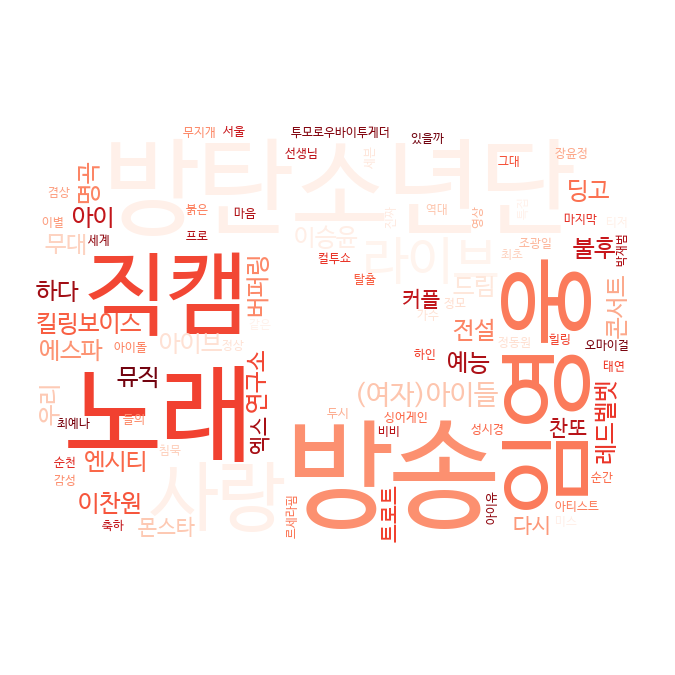

In [215]:
## Music 2022 트렌드 키워드


#titles을 모두 한 리스트에 담는 과정입니다.
titles=[]

#reset_index를 하는 이유는, for문을 돌리기 위해서입니다!
df_Music_2022 = df_2022[df_2022['category_name']=='Music'].reset_index()


for i in range (0,len(df_Music_2022)):
    titles.append(df_Music_2022['title'][i]) #요소를 하나하나씩 list에 담습니다!
    
# 뒤에서 진행할 형태소 분석을 위해 리스트를 해제해줍니다!
titles = "".join(titles)

#okt = konlpy.tag.Okt() #형태소 분석기 호출
titles_pos = twitter.pos(titles) #문자열을 형태소 분석기에 넣기

# 보통은 명사, 형용사, 동사가 많은 의미를 담고 있으니
# 명사, 형용사, 동사에 해당하는 word들만 빼내는 과정을 거칩니다.

titles_f = list([word for word, pos in titles_pos if (pos=='Noun')|(pos=='Verb')|(pos=='Adjective')])

#위에를 보니까 정말 많이 등장하지만 별로 필요없는 단어들이 보입니다

#단어가 필요없는 거는 stop_words에 넣어주고, 이미 위에서 한자리단어는 필요없으니 len(word)==1이면 제거해주는 코드를 사용합니다!
stop_words = ['합니다','해주세요','한다','입니다','하는','하니','하면서','이렇게나','있으면','했습니다','봤습니다','까지','어요','다가']
unique_title = set(titles_f) #중복되는 단어들을 없앤 버전이 unique_title입니다.

for word in unique_title:
    if word in stop_words or len(word) == 1:
        while word in titles_f:
            titles_f.remove(word) #stop_words에 해당되거나 한 자리 숫자의 단어를 titles_f에서 제거
            
#Counter 작동! - Counter는 빈도를 세어줍니다.

#빈도 분석을 한 것은 c에 담습니다!
Music_2022 = Counter(titles_f)


# 드디어 워드클라우드를 생성해보아요!
icon = Image.open('C:/Users/Shon/Desktop/연세대학교/DSL/EDA/youtube-removebg-preview.png')    # 마스크가 될 이미지 불러오기
#plt.imshow(icon)

mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)


wordcloud1 = WordCloud(
    font_path=FONT_PATH,
    background_color='white',                                #사이즈설정
    max_words=200,                                         #단어갯수
    mask=mask,
    colormap="Reds", #킵 autumn
    #background_color="white",
    random_state=1,
    scale=3
)


wordcloud1.generate_from_frequencies(Music_2022)
wordcloud1.to_image()

#불후의 명곡
#레드벨벳
#킬링 보이스
#에스파
#싱어게인
#투모로우 바이 투게더
#볼빨간 사춘기
#엔시티
#여자아이들

In [216]:
#막대그래프로 빈도 쉽게 봅시다!!!!
tot_title=pd.DataFrame({
    "word":titles_f
})
tot_title['count']=1
tot_title=tot_title.groupby(by=['word'],as_index=False).count()
tot_title=tot_title.sort_values(by='count',ascending=False).head(30)
tot_title

,word,count
303,방송,25
305,방탄소년단,25
124,노래,25
600,임영웅,21
662,직캠,18
370,사랑,17
204,라이브,16
0,(여자)아이들,15
256,명곡,13
347,불후,13


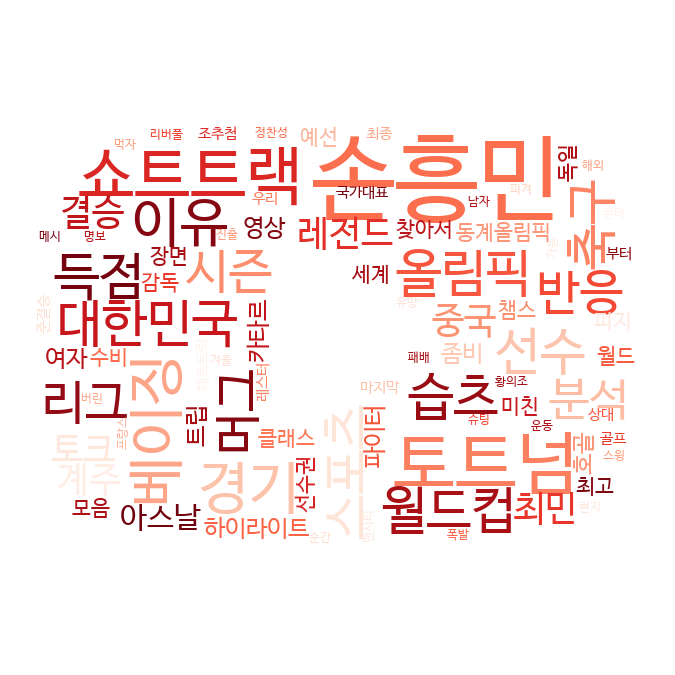

In [217]:
## Sports 2022 트렌드 키워드


#titles을 모두 한 리스트에 담는 과정입니다.
titles=[]

#reset_index를 하는 이유는, for문을 돌리기 위해서입니다!
df_Sports_2022 = df_2022[df_2022['category_name']=='Sports'].reset_index()


for i in range (0,len(df_Sports_2022)):
    titles.append(df_Sports_2022['title'][i]) #요소를 하나하나씩 list에 담습니다!
    
# 뒤에서 진행할 형태소 분석을 위해 리스트를 해제해줍니다!
titles = "".join(titles)

#okt = konlpy.tag.Okt() #형태소 분석기 호출
titles_pos = twitter.pos(titles) #문자열을 형태소 분석기에 넣기

# 보통은 명사, 형용사, 동사가 많은 의미를 담고 있으니
# 명사, 형용사, 동사에 해당하는 word들만 빼내는 과정을 거칩니다.

titles_f = list([word for word, pos in titles_pos if (pos=='Noun')|(pos=='Verb')|(pos=='Adjective')])

#위에를 보니까 정말 많이 등장하지만 별로 필요없는 단어들이 보입니다

#단어가 필요없는 거는 stop_words에 넣어주고, 이미 위에서 한자리단어는 필요없으니 len(word)==1이면 제거해주는 코드를 사용합니다!
stop_words = ['합니다','해주세요','한다','입니다','하는','하니','하면서','이렇게나','있으면','했습니다','봤습니다','까지','어요','다가']
unique_title = set(titles_f) #중복되는 단어들을 없앤 버전이 unique_title입니다.

for word in unique_title:
    if word in stop_words or len(word) == 1:
        while word in titles_f:
            titles_f.remove(word) #stop_words에 해당되거나 한 자리 숫자의 단어를 titles_f에서 제거
            
#Counter 작동! - Counter는 빈도를 세어줍니다.

#빈도 분석을 한 것은 c에 담습니다!
Sports_2022 = Counter(titles_f)


# 드디어 워드클라우드를 생성해보아요!
icon = Image.open('C:/Users/Shon/Desktop/연세대학교/DSL/EDA/youtube-removebg-preview.png')    # 마스크가 될 이미지 불러오기
#plt.imshow(icon)

mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)


wordcloud1 = WordCloud(
    font_path=FONT_PATH,
    background_color='white',                                #사이즈설정
    max_words=200,                                         #단어갯수
    mask=mask,
    colormap="Reds", #킵 autumn
    #background_color="white",
    random_state=1,
    scale=3
)


wordcloud1.generate_from_frequencies(Sports_2022)
wordcloud1.to_image()



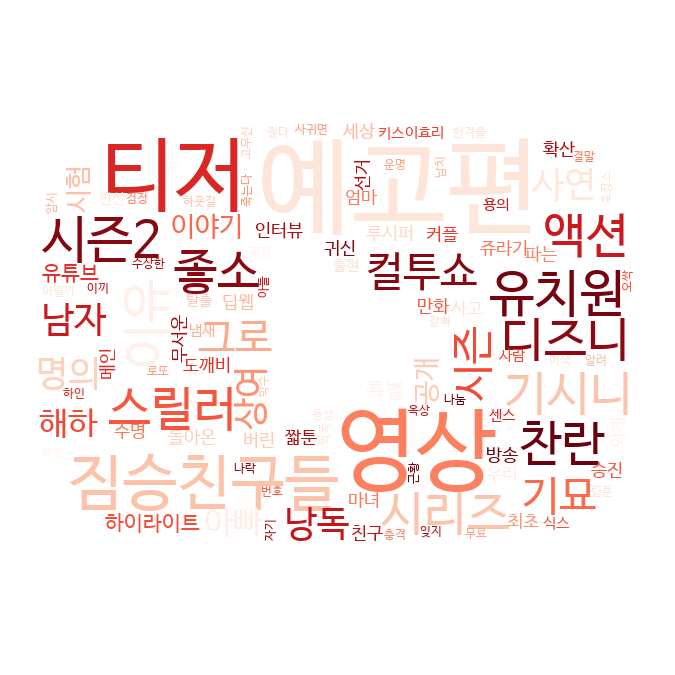

In [218]:
## Film & Animation 2022 트렌드 키워드


#titles을 모두 한 리스트에 담는 과정입니다.
titles=[]

#reset_index를 하는 이유는, for문을 돌리기 위해서입니다!
df_FilmAnimation_2022 = df_2022[df_2022['category_name']=='Film & Animation'].reset_index()


for i in range (0,len(df_FilmAnimation_2022)):
    titles.append(df_FilmAnimation_2022['title'][i]) #요소를 하나하나씩 list에 담습니다!
    
# 뒤에서 진행할 형태소 분석을 위해 리스트를 해제해줍니다!
titles = "".join(titles)

#okt = konlpy.tag.Okt() #형태소 분석기 호출
titles_pos = twitter.pos(titles) #문자열을 형태소 분석기에 넣기

# 보통은 명사, 형용사, 동사가 많은 의미를 담고 있으니
# 명사, 형용사, 동사에 해당하는 word들만 빼내는 과정을 거칩니다.

titles_f = list([word for word, pos in titles_pos if (pos=='Noun')|(pos=='Verb')|(pos=='Adjective')])

#위에를 보니까 정말 많이 등장하지만 별로 필요없는 단어들이 보입니다

#단어가 필요없는 거는 stop_words에 넣어주고, 이미 위에서 한자리단어는 필요없으니 len(word)==1이면 제거해주는 코드를 사용합니다!
stop_words = ['합니다','해주세요','한다','입니다','하는','하니','하면서','이렇게나','있으면','했습니다','봤습니다','까지','어요','다가']
unique_title = set(titles_f) #중복되는 단어들을 없앤 버전이 unique_title입니다.

for word in unique_title:
    if word in stop_words or len(word) == 1:
        while word in titles_f:
            titles_f.remove(word) #stop_words에 해당되거나 한 자리 숫자의 단어를 titles_f에서 제거
            
#Counter 작동! - Counter는 빈도를 세어줍니다.

#빈도 분석을 한 것은 c에 담습니다!
FilmAnimation_2022 = Counter(titles_f)


# 드디어 워드클라우드를 생성해보아요!
icon = Image.open('C:/Users/Shon/Desktop/연세대학교/DSL/EDA/youtube-removebg-preview.png')    # 마스크가 될 이미지 불러오기
#plt.imshow(icon)

mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)


wordcloud1 = WordCloud(
    font_path=FONT_PATH,
    background_color='white',                                #사이즈설정
    max_words=200,                                         #단어갯수
    mask=mask,
    colormap="Reds", #킵 autumn
    #background_color="white",
    random_state=1,
    scale=3
)


wordcloud1.generate_from_frequencies(FilmAnimation_2022)
wordcloud1.to_image()

#기시니 스릴러툰
#짐승 친구들

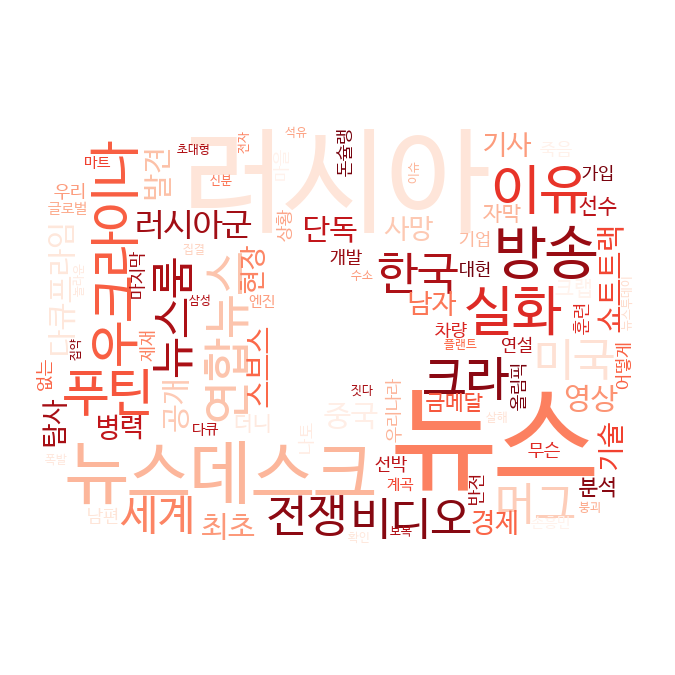

In [219]:
## News & Politics 2022 트렌드 키워드


#titles을 모두 한 리스트에 담는 과정입니다.
titles=[]

#reset_index를 하는 이유는, for문을 돌리기 위해서입니다!
df_NewsPolitics_2022 = df_2022[df_2022['category_name']=='News & Politics'].reset_index()


for i in range (0,len(df_NewsPolitics_2022)):
    titles.append(df_NewsPolitics_2022['title'][i]) #요소를 하나하나씩 list에 담습니다!
    
# 뒤에서 진행할 형태소 분석을 위해 리스트를 해제해줍니다!
titles = "".join(titles)

#okt = konlpy.tag.Okt() #형태소 분석기 호출
titles_pos = twitter.pos(titles) #문자열을 형태소 분석기에 넣기

# 보통은 명사, 형용사, 동사가 많은 의미를 담고 있으니
# 명사, 형용사, 동사에 해당하는 word들만 빼내는 과정을 거칩니다.

titles_f = list([word for word, pos in titles_pos if (pos=='Noun')|(pos=='Verb')|(pos=='Adjective')])

#위에를 보니까 정말 많이 등장하지만 별로 필요없는 단어들이 보입니다

#단어가 필요없는 거는 stop_words에 넣어주고, 이미 위에서 한자리단어는 필요없으니 len(word)==1이면 제거해주는 코드를 사용합니다!
stop_words = ['합니다','해주세요','한다','입니다','하는','하니','하면서','이렇게나','있으면','했습니다','봤습니다','까지','어요','다가']
unique_title = set(titles_f) #중복되는 단어들을 없앤 버전이 unique_title입니다.

for word in unique_title:
    if word in stop_words or len(word) == 1:
        while word in titles_f:
            titles_f.remove(word) #stop_words에 해당되거나 한 자리 숫자의 단어를 titles_f에서 제거
            
#Counter 작동! - Counter는 빈도를 세어줍니다.

#빈도 분석을 한 것은 c에 담습니다!
NewsPolitics_2022 = Counter(titles_f)


# 드디어 워드클라우드를 생성해보아요!
icon = Image.open('C:/Users/Shon/Desktop/연세대학교/DSL/EDA/youtube-removebg-preview.png')    # 마스크가 될 이미지 불러오기
#plt.imshow(icon)

mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)


wordcloud1 = WordCloud(
    font_path=FONT_PATH,
    background_color='white',                                #사이즈설정
    max_words=200,                                         #단어갯수
    mask=mask,
    colormap="Reds", #킵 autumn
    #background_color="white",
    random_state=1,
    scale=3
)

wordcloud1.generate_from_frequencies(NewsPolitics_2022)
wordcloud1.to_image()

#개인 채널이 아니라 뉴스 채널이 인기

In [220]:
df_2021 = df[df['trending_date'].dt.year==2021]

In [221]:
df_2021.sort_values(by='trending_date',ascending=True)

,video_id,title,publishedAt,channelId,channelTitle,trending_date,tags,view_count,likes,dislikes,comment_count,description,category_name,tag_num,period,Unnamed: 0,comments_disabled,ratings_disabled
4122,qPljYpoAQYk,[밥묵자] 그만 쳐무라 짜쓱아 (feat. 유민상),2020-12-20 12:00:13,UCSc2DcSzzjHgBn8Hg0KG7PA,꼰대희,2021-01-01,꼰대희|김대희|밥묵자|유민상|족발|막국수|맛있는녀석들|맛녀,3919224,66526,1384,7392,#꼰대희 #밥묵자 #유민상오늘은 사촌동생 꼰민상과 족발&막국수를 먹어봤다,People & Blogs,8,9,24729.0,False,False
4209,itw0qn_Dn5k,사막마을 벼수확(5번째 이야기) / 참 까지 얻어먹고~~,2020-12-23 20:00:07,UCV0x4RSwwxfMXJxjrl2UsOQ,어슬렁 어슬렁 아프리카 벌써5년,2021-01-01,#Video.Guru|아프리카새마을운동,317496,5267,115,570,"/구독, 좋아요/ 좀 눌러주세요./ 공짜 입니다.// 본 방송은 세네갈 사막마을에서...",Nonprofits & Activism,2,8,24715.0,False,False
4210,2ffAtA9zXAE,운동유튜버인데 먹방 조회수가 더 잘 나오는 사람,2020-12-23 08:00:10,UCoHirUZkTs1nOtyJTNbNJ5g,지피티,2021-01-01,운동|헬스|다이어트|벌크업|멸치탈출|지피티|운동유튜버|아프리카티비|먹방|남캠|푸쉬업...,446823,7158,204,2255,구독과 좋아요! 공유 부탁드립니다!영상을 통해 많은 도움이 되셨으면 좋겠습니다 :)...,Sports,107,8,24723.0,False,False
4211,K_3wOiHn0l0,120만 유튜버한테 요리를 배우러 갔지만... (feat.승우아빠),2020-12-23 12:00:14,UCuLHDMXUqV5JR8Qv-FpwF8g,민경장군,2021-01-01,개그맨|맛녀|맛있는녀석들|한입만|운동뚱|쇼미더오븐|수플레버거|디저트|eatingso...,217860,5705,55,478,쫄병아리 여러분~~!제가 승우아빠를 만나고 왔습니다~!~!푹신한 '수플레'와 짭조름...,Entertainment,12,6,24743.0,False,False
4216,lNTz18NAfSw,눈치빠른황제성,2020-12-23 06:49:53,UCsIoa5Hcc4qBKNzVcEcBxXA,스브스 트렌즈,2021-01-01,SBS|스브스|SBSTrends|스브스트렌즈|황제성|런닝맨|유재석|김종국|하하|이광...,524777,3095,106,170,양세찬이 하하에게 탈출을 못하면 벌칙을 받으라고 말한다 하하가 벌칙으로 양세찬 집에...,Entertainment,36,6,24741.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12919,jFAYxGwFPHk,BTS (방탄소년단) CCTV LIVE Teaser,2021-12-20 11:00:01,UCLkAepWjdylmXSltofFvsYQ,BANGTANTV,2021-12-31,방탄소년단|BTS|BANGTAN|알엠|RM|슈가|SUGA|제이홉|jhope|지민|정...,4522603,625209,0,13416,BTS CCTV LIVE begins soon:📹 https://youtu.be/U...,Music,18,11,99136.0,False,False
12877,5XUvXpg8yOE,Highlights: Tottenham 2-2 Liverpool | Jota & R...,2021-12-19 22:00:01,UC9LQwHZoucFT94I2h6JOcjw,Liverpool FC,2021-12-31,Liverpool FC|LFC|Liverpool|Anfield|Melwood|Liv...,2457363,34589,0,1508,Diogo Jota and Andy Robertson netted brilliant...,Sports,10,11,99101.0,False,False
12840,KlSSc-q3cfE,나만 무능력자다 [기시니 스릴러툰],2021-12-17 09:00:09,UCi-XI2BIPJmjmp5EbKl6YTQ,기시니 스릴러툰,2021-12-31,초능력자|장애인|차별,378457,6852,0,1119,이 영상은 픽션입니다. 항상 시청해주셔서 감사합니다.- BGM -Smasher b...,Film & Animation,3,14,99139.0,False,False
12960,Jrb8XZuhUjw,[기자수첩91]국민가수 최종 우승자! 올댓스타는 바로 이사람을 꼽았습니다!,2021-12-22 03:56:35,UC673sGW_WixiWKFX-J_Yo0Q,올댓스타,2021-12-31,[None],427478,13964,0,3364,#국민가수 #top7 #박창근 #김동현 #이솔로몬 #이병찬 #고은성 #박장현 #손진...,Travel & Events,0,8,99078.0,False,False


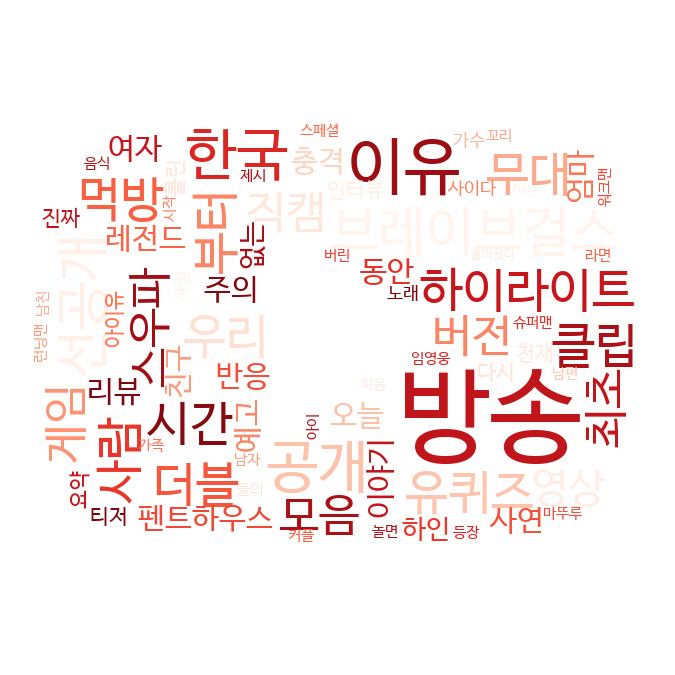

In [222]:
## Entertainment 2021 트렌드 키워드


#titles을 모두 한 리스트에 담는 과정입니다.
titles=[]

#reset_index를 하는 이유는, for문을 돌리기 위해서입니다!
df_Entertainment_2021 = df_2021[df_2021['category_name']=='Entertainment'].reset_index()


for i in range (0,len(df_Entertainment_2021)):
    titles.append(df_Entertainment_2021['title'][i]) #요소를 하나하나씩 list에 담습니다!
    
# 뒤에서 진행할 형태소 분석을 위해 리스트를 해제해줍니다!
titles = "".join(titles)

#okt = konlpy.tag.Okt() #형태소 분석기 호출
titles_pos = twitter.pos(titles) #문자열을 형태소 분석기에 넣기

# 보통은 명사, 형용사, 동사가 많은 의미를 담고 있으니
# 명사, 형용사, 동사에 해당하는 word들만 빼내는 과정을 거칩니다.

titles_f = list([word for word, pos in titles_pos if (pos=='Noun')|(pos=='Verb')|(pos=='Adjective')])

#위에를 보니까 정말 많이 등장하지만 별로 필요없는 단어들이 보입니다

#단어가 필요없는 거는 stop_words에 넣어주고, 이미 위에서 한자리단어는 필요없으니 len(word)==1이면 제거해주는 코드를 사용합니다!
stop_words = ['합니다','해주세요','한다','입니다','하는','하니','하면서','이렇게나','있으면','했습니다','봤습니다','까지','어요','다가']
unique_title = set(titles_f) #중복되는 단어들을 없앤 버전이 unique_title입니다.

for word in unique_title:
    if word in stop_words or len(word) == 1:
        while word in titles_f:
            titles_f.remove(word) #stop_words에 해당되거나 한 자리 숫자의 단어를 titles_f에서 제거
            
#Counter 작동! - Counter는 빈도를 세어줍니다.

#빈도 분석을 한 것은 c에 담습니다!
Entertainment_2021 = Counter(titles_f)


# 드디어 워드클라우드를 생성해보아요!
icon = Image.open('C:/Users/Shon/Desktop/연세대학교/DSL/EDA/youtube-removebg-preview.png')    # 마스크가 될 이미지 불러오기
#plt.imshow(icon)

mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)


wordcloud1 = WordCloud(
    font_path=FONT_PATH,
    background_color='white',                                #사이즈설정
    max_words=200,                                         #단어갯수
    mask=mask,
    colormap="Reds", #킵 autumn
    #background_color="white",
    random_state=1,
    scale=3
)

wordcloud1.generate_from_frequencies(Entertainment_2021)
wordcloud1.to_image()

#오징어게임
#놀면뭐하니
#선공개
#스우파

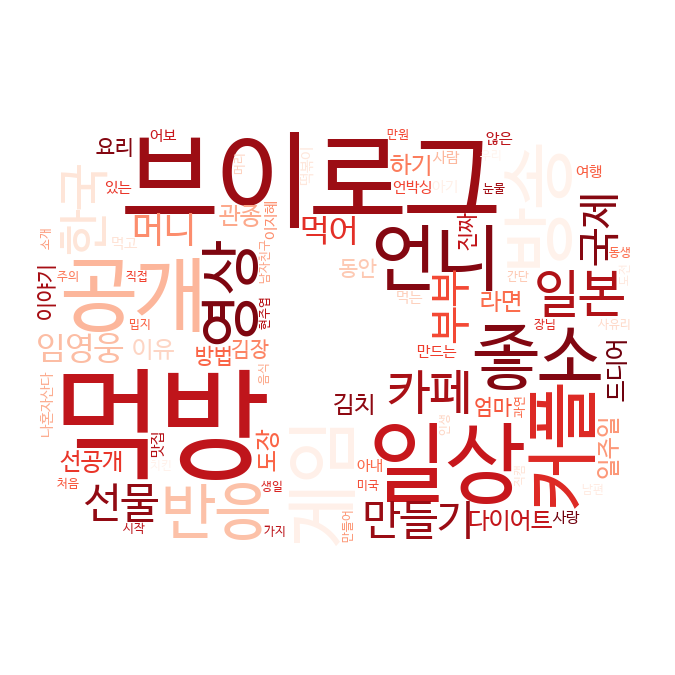

In [223]:
## People & Blogs 2021 트렌드 키워드


#titles을 모두 한 리스트에 담는 과정입니다.
titles=[]

#reset_index를 하는 이유는, for문을 돌리기 위해서입니다!
df_PeopleBlogs_2021 = df_2021[df_2021['category_name']=='People & Blogs'].reset_index()


for i in range (0,len(df_PeopleBlogs_2021)):
    titles.append(df_PeopleBlogs_2021['title'][i]) #요소를 하나하나씩 list에 담습니다!
    
# 뒤에서 진행할 형태소 분석을 위해 리스트를 해제해줍니다!
titles = "".join(titles)

#okt = konlpy.tag.Okt() #형태소 분석기 호출
titles_pos = twitter.pos(titles) #문자열을 형태소 분석기에 넣기

# 보통은 명사, 형용사, 동사가 많은 의미를 담고 있으니
# 명사, 형용사, 동사에 해당하는 word들만 빼내는 과정을 거칩니다.

titles_f = list([word for word, pos in titles_pos if (pos=='Noun')|(pos=='Verb')|(pos=='Adjective')])

#위에를 보니까 정말 많이 등장하지만 별로 필요없는 단어들이 보입니다

#단어가 필요없는 거는 stop_words에 넣어주고, 이미 위에서 한자리단어는 필요없으니 len(word)==1이면 제거해주는 코드를 사용합니다!
stop_words = ['합니다','해주세요','한다','입니다','하는','하니','하면서','이렇게나','있으면','했습니다','봤습니다','까지','어요','다가']
unique_title = set(titles_f) #중복되는 단어들을 없앤 버전이 unique_title입니다.

for word in unique_title:
    if word in stop_words or len(word) == 1:
        while word in titles_f:
            titles_f.remove(word) #stop_words에 해당되거나 한 자리 숫자의 단어를 titles_f에서 제거
            
#Counter 작동! - Counter는 빈도를 세어줍니다.

#빈도 분석을 한 것은 c에 담습니다!
PeopleBlogs_2021 = Counter(titles_f)


# 드디어 워드클라우드를 생성해보아요!
icon = Image.open('C:/Users/Shon/Desktop/연세대학교/DSL/EDA/youtube-removebg-preview.png')    # 마스크가 될 이미지 불러오기
#plt.imshow(icon)

mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)


wordcloud1 = WordCloud(
    font_path=FONT_PATH,
    background_color='white',                                #사이즈설정
    max_words=200,                                         #단어갯수
    mask=mask,
    colormap="Reds", #킵 autumn
    #background_color="white",
    random_state=1,
    scale=3
)


wordcloud1.generate_from_frequencies(PeopleBlogs_2021)
wordcloud1.to_image()

#브이로그


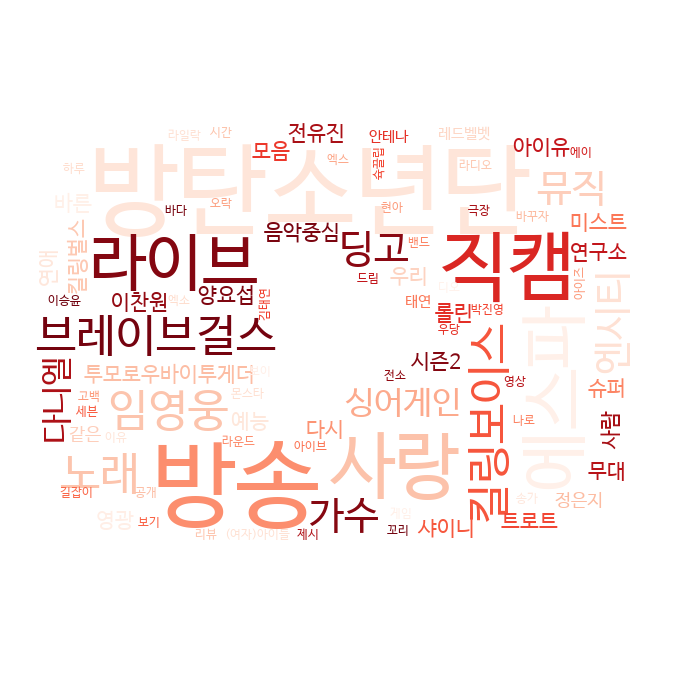

In [224]:
## Music 2021 트렌드 키워드


#titles을 모두 한 리스트에 담는 과정입니다.
titles=[]

#reset_index를 하는 이유는, for문을 돌리기 위해서입니다!
df_Music_2021 = df_2021[df_2021['category_name']=='Music'].reset_index()


for i in range (0,len(df_Music_2021)):
    titles.append(df_Music_2021['title'][i]) #요소를 하나하나씩 list에 담습니다!
    
# 뒤에서 진행할 형태소 분석을 위해 리스트를 해제해줍니다!
titles = "".join(titles)

#okt = konlpy.tag.Okt() #형태소 분석기 호출
titles_pos = twitter.pos(titles) #문자열을 형태소 분석기에 넣기

# 보통은 명사, 형용사, 동사가 많은 의미를 담고 있으니
# 명사, 형용사, 동사에 해당하는 word들만 빼내는 과정을 거칩니다.

titles_f = list([word for word, pos in titles_pos if (pos=='Noun')|(pos=='Verb')|(pos=='Adjective')])

#위에를 보니까 정말 많이 등장하지만 별로 필요없는 단어들이 보입니다

#단어가 필요없는 거는 stop_words에 넣어주고, 이미 위에서 한자리단어는 필요없으니 len(word)==1이면 제거해주는 코드를 사용합니다!
stop_words = ['합니다','해주세요','한다','입니다','하는','하니','하면서','이렇게나','있으면','했습니다','봤습니다','까지','어요','다가']
unique_title = set(titles_f) #중복되는 단어들을 없앤 버전이 unique_title입니다.

for word in unique_title:
    if word in stop_words or len(word) == 1:
        while word in titles_f:
            titles_f.remove(word) #stop_words에 해당되거나 한 자리 숫자의 단어를 titles_f에서 제거
            
#Counter 작동! - Counter는 빈도를 세어줍니다.

#빈도 분석을 한 것은 c에 담습니다!
Music_2021 = Counter(titles_f)


# 드디어 워드클라우드를 생성해보아요!
icon = Image.open('C:/Users/Shon/Desktop/연세대학교/DSL/EDA/youtube-removebg-preview.png')    # 마스크가 될 이미지 불러오기
#plt.imshow(icon)

mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)


wordcloud1 = WordCloud(
    font_path=FONT_PATH,
    background_color='white',                                #사이즈설정
    max_words=200,                                         #단어갯수
    mask=mask,
    colormap="Reds", #킵 autumn
    #background_color="white",
    random_state=1,
    scale=3
)


wordcloud1.generate_from_frequencies(Music_2021)
wordcloud1.to_image()

#에스파
#투모로우 바이 투게더
#싱어게인

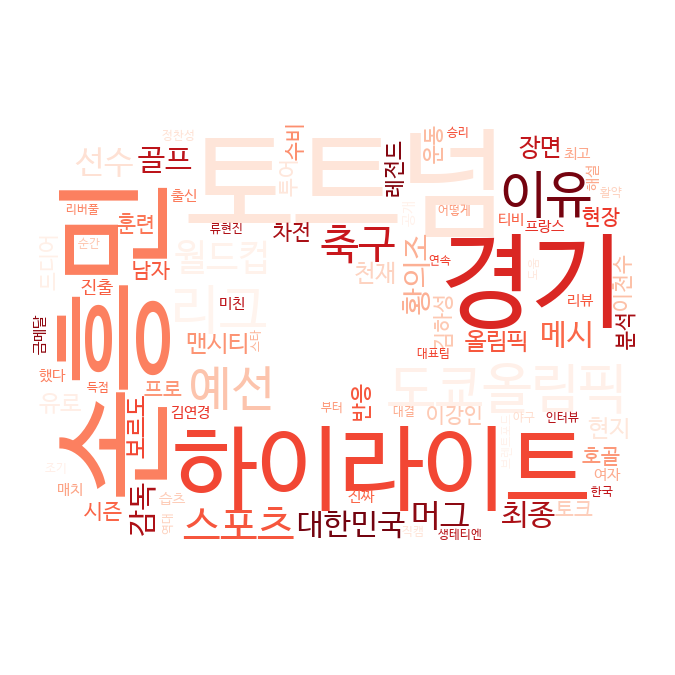

In [225]:
## Sports 2021 트렌드 키워드


#titles을 모두 한 리스트에 담는 과정입니다.
titles=[]

#reset_index를 하는 이유는, for문을 돌리기 위해서입니다!
df_Sports_2021 = df_2021[df_2021['category_name']=='Sports'].reset_index()


for i in range (0,len(df_Sports_2021)):
    titles.append(df_Sports_2021['title'][i]) #요소를 하나하나씩 list에 담습니다!
    
# 뒤에서 진행할 형태소 분석을 위해 리스트를 해제해줍니다!
titles = "".join(titles)

#okt = konlpy.tag.Okt() #형태소 분석기 호출
titles_pos = twitter.pos(titles) #문자열을 형태소 분석기에 넣기

# 보통은 명사, 형용사, 동사가 많은 의미를 담고 있으니
# 명사, 형용사, 동사에 해당하는 word들만 빼내는 과정을 거칩니다.

titles_f = list([word for word, pos in titles_pos if (pos=='Noun')|(pos=='Verb')|(pos=='Adjective')])

#위에를 보니까 정말 많이 등장하지만 별로 필요없는 단어들이 보입니다

#단어가 필요없는 거는 stop_words에 넣어주고, 이미 위에서 한자리단어는 필요없으니 len(word)==1이면 제거해주는 코드를 사용합니다!
stop_words = ['합니다','해주세요','한다','입니다','하는','하니','하면서','이렇게나','있으면','했습니다','봤습니다','까지','어요','다가']
unique_title = set(titles_f) #중복되는 단어들을 없앤 버전이 unique_title입니다.

for word in unique_title:
    if word in stop_words or len(word) == 1:
        while word in titles_f:
            titles_f.remove(word) #stop_words에 해당되거나 한 자리 숫자의 단어를 titles_f에서 제거
            
#Counter 작동! - Counter는 빈도를 세어줍니다.

#빈도 분석을 한 것은 c에 담습니다!
Sports_2021 = Counter(titles_f)


# 드디어 워드클라우드를 생성해보아요!
icon = Image.open('C:/Users/Shon/Desktop/연세대학교/DSL/EDA/youtube-removebg-preview.png')    # 마스크가 될 이미지 불러오기
#plt.imshow(icon)

mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)


wordcloud1 = WordCloud(
    font_path=FONT_PATH,
    background_color='white',                                #사이즈설정
    max_words=200,                                         #단어갯수
    mask=mask,
    colormap="Reds", #킵 autumn
    #background_color="white",
    random_state=1,
    scale=3
)


wordcloud1.generate_from_frequencies(Sports_2021)
wordcloud1.to_image()



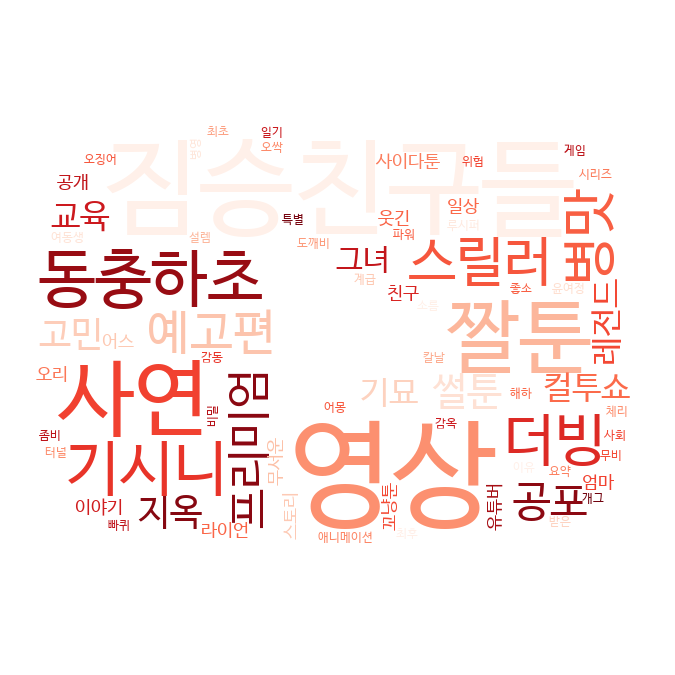

In [226]:
## Film & Animation 2021 트렌드 키워드


#titles을 모두 한 리스트에 담는 과정입니다.
titles=[]

#reset_index를 하는 이유는, for문을 돌리기 위해서입니다!
df_FilmAnimation_2021 = df_2021[df_2021['category_name']=='Film & Animation'].reset_index()


for i in range (0,len(df_FilmAnimation_2021)):
    titles.append(df_FilmAnimation_2021['title'][i]) #요소를 하나하나씩 list에 담습니다!
    
# 뒤에서 진행할 형태소 분석을 위해 리스트를 해제해줍니다!
titles = "".join(titles)

#okt = konlpy.tag.Okt() #형태소 분석기 호출
titles_pos = twitter.pos(titles) #문자열을 형태소 분석기에 넣기

# 보통은 명사, 형용사, 동사가 많은 의미를 담고 있으니
# 명사, 형용사, 동사에 해당하는 word들만 빼내는 과정을 거칩니다.

titles_f = list([word for word, pos in titles_pos if (pos=='Noun')|(pos=='Verb')|(pos=='Adjective')])

#위에를 보니까 정말 많이 등장하지만 별로 필요없는 단어들이 보입니다

#단어가 필요없는 거는 stop_words에 넣어주고, 이미 위에서 한자리단어는 필요없으니 len(word)==1이면 제거해주는 코드를 사용합니다!
stop_words = ['합니다','해주세요','한다','입니다','하는','하니','하면서','이렇게나','있으면','했습니다','봤습니다','까지','어요','다가']
unique_title = set(titles_f) #중복되는 단어들을 없앤 버전이 unique_title입니다.

for word in unique_title:
    if word in stop_words or len(word) == 1:
        while word in titles_f:
            titles_f.remove(word) #stop_words에 해당되거나 한 자리 숫자의 단어를 titles_f에서 제거
            
#Counter 작동! - Counter는 빈도를 세어줍니다.

#빈도 분석을 한 것은 c에 담습니다!
FilmAnimation_2021 = Counter(titles_f)


# 드디어 워드클라우드를 생성해보아요!
icon = Image.open('C:/Users/Shon/Desktop/연세대학교/DSL/EDA/youtube-removebg-preview.png')    # 마스크가 될 이미지 불러오기
#plt.imshow(icon)

mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)


wordcloud1 = WordCloud(
    font_path=FONT_PATH,
    background_color='white',                                #사이즈설정
    max_words=200,                                         #단어갯수
    mask=mask,
    colormap="Reds", #킵 autumn
    #background_color="white",
    random_state=1,
    scale=3
)


wordcloud1.generate_from_frequencies(FilmAnimation_2021)
wordcloud1.to_image()


#기시니 스릴러툰
#짐승친구들
#짤툰프리미엄
#사이다툰

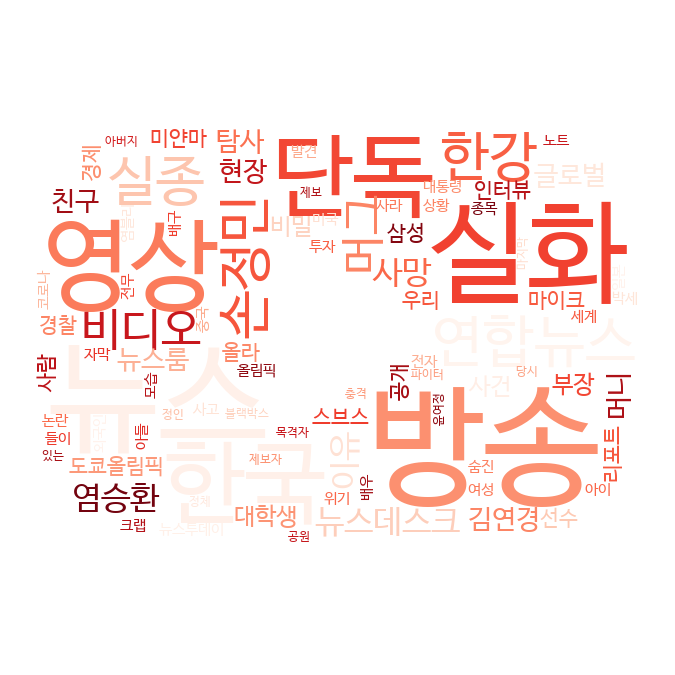

In [227]:
## News & Politics 2021 트렌드 키워드


#titles을 모두 한 리스트에 담는 과정입니다.
titles=[]

#reset_index를 하는 이유는, for문을 돌리기 위해서입니다!
df_NewsPolitics_2021 = df_2021[df_2021['category_name']=='News & Politics'].reset_index()


for i in range (0,len(df_NewsPolitics_2021)):
    titles.append(df_NewsPolitics_2021['title'][i]) #요소를 하나하나씩 list에 담습니다!
    
# 뒤에서 진행할 형태소 분석을 위해 리스트를 해제해줍니다!
titles = "".join(titles)

#okt = konlpy.tag.Okt() #형태소 분석기 호출
titles_pos = twitter.pos(titles) #문자열을 형태소 분석기에 넣기

# 보통은 명사, 형용사, 동사가 많은 의미를 담고 있으니
# 명사, 형용사, 동사에 해당하는 word들만 빼내는 과정을 거칩니다.

titles_f = list([word for word, pos in titles_pos if (pos=='Noun')|(pos=='Verb')|(pos=='Adjective')])

#위에를 보니까 정말 많이 등장하지만 별로 필요없는 단어들이 보입니다

#단어가 필요없는 거는 stop_words에 넣어주고, 이미 위에서 한자리단어는 필요없으니 len(word)==1이면 제거해주는 코드를 사용합니다!
stop_words = ['합니다','해주세요','한다','입니다','하는','하니','하면서','이렇게나','있으면','했습니다','봤습니다','까지','어요','다가']
unique_title = set(titles_f) #중복되는 단어들을 없앤 버전이 unique_title입니다.

for word in unique_title:
    if word in stop_words or len(word) == 1:
        while word in titles_f:
            titles_f.remove(word) #stop_words에 해당되거나 한 자리 숫자의 단어를 titles_f에서 제거
            
#Counter 작동! - Counter는 빈도를 세어줍니다.

#빈도 분석을 한 것은 c에 담습니다!
NewsPolitics_2021 = Counter(titles_f)


# 드디어 워드클라우드를 생성해보아요!
icon = Image.open('C:/Users/Shon/Desktop/연세대학교/DSL/EDA/youtube-removebg-preview.png')    # 마스크가 될 이미지 불러오기
#plt.imshow(icon)

mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)


wordcloud1 = WordCloud(
    font_path=FONT_PATH,
    background_color='white',                                #사이즈설정
    max_words=200,                                         #단어갯수
    mask=mask,
    colormap="Reds", #킵 autumn
    #background_color="white",
    random_state=1,
    scale=3
)


wordcloud1.generate_from_frequencies(NewsPolitics_2021)
wordcloud1.to_image()



In [228]:
df_2020 = df[df['trending_date'].dt.year==2020]

In [229]:
df_2020.sort_values(by='trending_date',ascending=True)

,video_id,title,publishedAt,channelId,channelTitle,trending_date,tags,view_count,likes,dislikes,comment_count,description,category_name,tag_num,period,Unnamed: 0,comments_disabled,ratings_disabled
97,DNOOxqIus08,멸치국수 천원??전메뉴 5개 다먹어도 6500원.. 두번 먹었습니다!!,2020-08-08 14:37:55,UCsNVs68quFJMaDmR6frfUsQ,야식이,2020-08-12,[None],518305,14089,410,2175,#멸치국수 #천원 #허니돈구독하기(Subscribe) 좋아요(Like) 고맙습니다!...,Entertainment,0,1,97.0,False,False
132,LZrdDbG-dBY,한강 물이 넘쳐도 편의점은 무사한 이유 /스브스뉴스,2020-08-06 07:00:04,UCQabORQKQRHP-iUqe-xIFvg,스브스뉴스 SUBUSU NEWS,2020-08-12,한강|한강 홍수|한강 침수|한강 범람|한강공원|한강 실시간|한강 편의점|한강 상황|...,2095241,15057,312,2841,엄청난 폭우로 물에 잠겨버린 한강공원.그 와중에 물에 둥둥 떠 있는... 편의점?!...,News & Politics,10,1,132.0,False,False
131,3SGlD1VZkUQ,이삭토스트를 처음 먹어본 영국인들의 반응??!!,2020-08-05 11:30:24,UCg-p3lQIqmhh7gHpyaOmOiQ,영국남자 Korean Englishman,2020-08-12,Korean|영국남자|영국|조쉬|올리|Josh|Ollie|KoreanEnglish|...,1114440,40937,391,4239,이 영상은 광고가 아닙니다!! 그냥 올리가 이삭토스트에 과몰입해서 그래요…😂저희는 ...,Comedy,46,1,131.0,False,False
130,bbMRX7iPmBE,드디어 액티브 노이즈 캔슬링!! 갤럭시 버즈 라이브 개봉기 [4K],2020-08-08 05:04:27,UC_0oo0GPlDUU88ubLDnJkSQ,UNDERkg,2020-08-12,갤럭시 버즈 라이브|갤럭시 버즈|갤럭시 버즈 라이브 개봉기|갤럭시 버즈 라이브 언박...,239235,3208,165,1164,- 자세한 사진은 https://bit.ly/31A2Odb- 바로 구매는 https...,Science & Technology,12,1,130.0,False,False
129,YVygKPVS_LA,[심약자 시청금지] 물귀신 찾으려 자X 한 곳까지 무속인과 ㄷㄷ,2020-08-09 10:00:09,UCg_lS-XS9Fh9I6Rl56Z8fpg,최고다윽박EUGBAK,2020-08-12,최고다윽박|자연인|바다|낚시|요리먹방|시골|아프리카TV|국민바보|eugbak|muk...,355410,6698,219,1428,#수살귀 #물귀신 #무당업로드 시간 ■화 목 토 일■ 저녁 7시 !!!각종 SNS에...,Comedy,44,1,129.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4188,StQz0S7X7H4,"비니, 알약, 산타가 없어도 저는 우원재입니다ㅣ쇼미더머니 전후의 삶 - 세번째 오아시스",2020-12-22 10:13:58,UCQNRHpNDMBUjyaLL61t_4Tg,미션 파서블,2020-12-31,쇼미더머니|우원재|에이전트h|AOMG|박재범|산타|비니|알약|쇼미|쇼미더머니9|쇼미...,408167,13123,105,1960,세 번째 오아시스 게스트로AOMG 우원재 님을 모셨습니다.그가 에이전트H에게 직접 ...,Entertainment,26,8,24535.0,False,False
4189,xXdfQA-8Auc,[골라봐야지] ＂어떻게 바로 등 돌리게 만드시는지..＂ 어제의 동지가 오늘의 적으로...,2020-12-22 07:40:01,UCF3UEVPt5zZTlBVJwDG317g,JTBC Voyage,2020-12-31,30호|63호|누구허니|연극 속에서|휘파람|chitty chitty bang ban...,2261974,26867,548,5069,30호 가수vs63호 가수누구 골라요..? 저는 못 고르겠습니다..?╭┈┈┈┈╯ ...,Entertainment,43,7,24532.0,False,False
4158,ECTCKxkxxB8,COVER │ TEXT ME MERRY CHRISTMAS │세븐틴 최고의 메인보컬 ...,2020-12-21 09:59:59,UCOiM8FuCUFJkuUjCmB14rgg,Leesuhyun,2020-12-31,[None],653931,97130,88,6929,오랜만이에요 여러분!!🤩올때마다 오랜만이라서 미안합니댜ㅜㅜ헝근데 오늘은 혼자 안왔어...,Music,0,8,24550.0,False,False
4184,MlbMZim_uAA,[몰카] 차를 빼달라해서 나갔더니 집주인이 나를 보고 설레여한다면?ㅋㅋㅋㅋㅋ,2020-12-22 09:00:15,UCEUL40nXJFCBv9z3Q1V6YMQ,면상들,2020-12-31,몰카|몰래카메라|면상들|욜로코믹스|코믹마트|드립팩토리|핫소스|보따|엔조이커플|동네놈...,231510,4065,234,841,#몰카 #몰래카메라 #면상들재밌게 봐주시고 구독과 좋아요는 저희에게 큰 힘이 됩니다!!,Comedy,14,8,24527.0,False,False


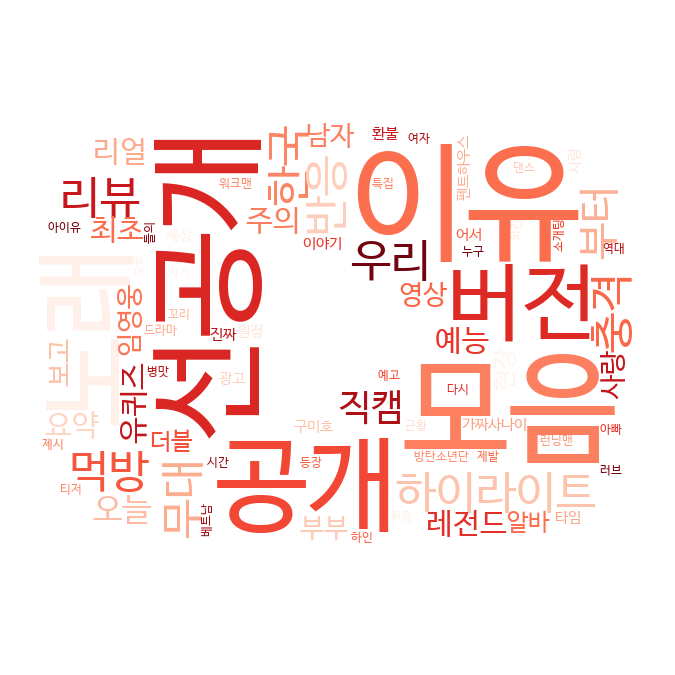

In [230]:
## Entertainment 2020 트렌드 키워드


#titles을 모두 한 리스트에 담는 과정입니다.
titles=[]

#reset_index를 하는 이유는, for문을 돌리기 위해서입니다!
df_Entertainment_2020 = df_2020[df_2020['category_name']=='Entertainment'].reset_index()


for i in range (0,len(df_Entertainment_2020)):
    titles.append(df_Entertainment_2020['title'][i]) #요소를 하나하나씩 list에 담습니다!
    
# 뒤에서 진행할 형태소 분석을 위해 리스트를 해제해줍니다!
titles = "".join(titles)

#okt = konlpy.tag.Okt() #형태소 분석기 호출
titles_pos = twitter.pos(titles) #문자열을 형태소 분석기에 넣기

# 보통은 명사, 형용사, 동사가 많은 의미를 담고 있으니
# 명사, 형용사, 동사에 해당하는 word들만 빼내는 과정을 거칩니다.

titles_f = list([word for word, pos in titles_pos if (pos=='Noun')|(pos=='Verb')|(pos=='Adjective')])

#위에를 보니까 정말 많이 등장하지만 별로 필요없는 단어들이 보입니다

#단어가 필요없는 거는 stop_words에 넣어주고, 이미 위에서 한자리단어는 필요없으니 len(word)==1이면 제거해주는 코드를 사용합니다!
stop_words = ['합니다','해주세요','한다','입니다','하는','하니','하면서','이렇게나','있으면','했습니다','봤습니다','까지','어요','다가']
unique_title = set(titles_f) #중복되는 단어들을 없앤 버전이 unique_title입니다.

for word in unique_title:
    if word in stop_words or len(word) == 1:
        while word in titles_f:
            titles_f.remove(word) #stop_words에 해당되거나 한 자리 숫자의 단어를 titles_f에서 제거
            
#Counter 작동! - Counter는 빈도를 세어줍니다.

#빈도 분석을 한 것은 c에 담습니다!
Entertainment_2020 = Counter(titles_f)


# 드디어 워드클라우드를 생성해보아요!
icon = Image.open('C:/Users/Shon/Desktop/연세대학교/DSL/EDA/youtube-removebg-preview.png')    # 마스크가 될 이미지 불러오기
#plt.imshow(icon)

mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)


wordcloud1 = WordCloud(
    font_path=FONT_PATH,
    background_color='white',                                #사이즈설정
    max_words=200,                                         #단어갯수
    mask=mask,
    colormap="Reds", #킵 autumn
    #background_color="white",
    random_state=1,
    scale=3
)


wordcloud1.generate_from_frequencies(Entertainment_2020)
wordcloud1.to_image()

#출장 십오야
#놀면 뭐하니
#쿠팡플레이
#선공개
#유퀴즈 온 더 블럭

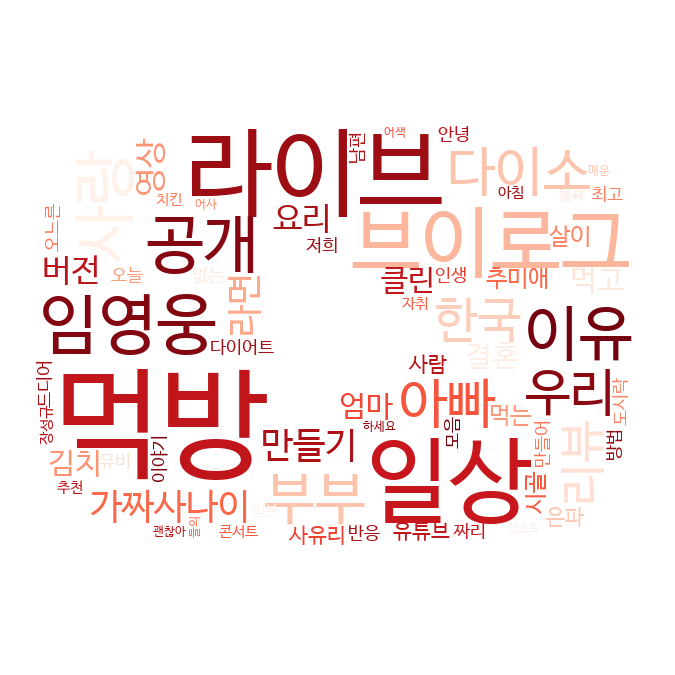

In [231]:
## People & Blogs 2020 트렌드 키워드


#titles을 모두 한 리스트에 담는 과정입니다.
titles=[]

#reset_index를 하는 이유는, for문을 돌리기 위해서입니다!
df_PeopleBlogs_2020 = df_2020[df_2020['category_name']=='People & Blogs'].reset_index()


for i in range (0,len(df_PeopleBlogs_2020)):
    titles.append(df_PeopleBlogs_2020['title'][i]) #요소를 하나하나씩 list에 담습니다!
    
# 뒤에서 진행할 형태소 분석을 위해 리스트를 해제해줍니다!
titles = "".join(titles)

#okt = konlpy.tag.Okt() #형태소 분석기 호출
titles_pos = twitter.pos(titles) #문자열을 형태소 분석기에 넣기

# 보통은 명사, 형용사, 동사가 많은 의미를 담고 있으니
# 명사, 형용사, 동사에 해당하는 word들만 빼내는 과정을 거칩니다.

titles_f = list([word for word, pos in titles_pos if (pos=='Noun')|(pos=='Verb')|(pos=='Adjective')])

#위에를 보니까 정말 많이 등장하지만 별로 필요없는 단어들이 보입니다

#단어가 필요없는 거는 stop_words에 넣어주고, 이미 위에서 한자리단어는 필요없으니 len(word)==1이면 제거해주는 코드를 사용합니다!
stop_words = ['합니다','해주세요','한다','입니다','하는','하니','하면서','이렇게나','있으면','했습니다','봤습니다','까지','어요','다가']
unique_title = set(titles_f) #중복되는 단어들을 없앤 버전이 unique_title입니다.

for word in unique_title:
    if word in stop_words or len(word) == 1:
        while word in titles_f:
            titles_f.remove(word) #stop_words에 해당되거나 한 자리 숫자의 단어를 titles_f에서 제거
            
#Counter 작동! - Counter는 빈도를 세어줍니다.

#빈도 분석을 한 것은 c에 담습니다!
PeopleBlogs_2020 = Counter(titles_f)


# 드디어 워드클라우드를 생성해보아요!
icon = Image.open('C:/Users/Shon/Desktop/연세대학교/DSL/EDA/youtube-removebg-preview.png')    # 마스크가 될 이미지 불러오기
#plt.imshow(icon)

mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)


wordcloud1 = WordCloud(
    font_path=FONT_PATH,
    background_color='white',                                #사이즈설정
    max_words=200,                                         #단어갯수
    mask=mask,
    colormap="Reds", #킵 autumn
    #background_color="white",
    random_state=1,
    scale=3
)

wordcloud1.generate_from_frequencies(PeopleBlogs_2020)
wordcloud1.to_image()

#가짜 사나이
#브이 로그
#선공개

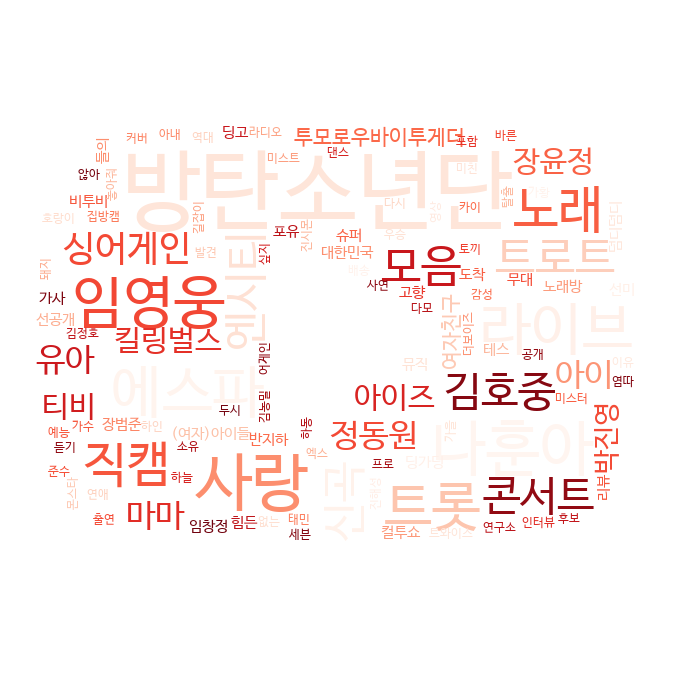

In [232]:
## Music 2020 트렌드 키워드


#titles을 모두 한 리스트에 담는 과정입니다.
titles=[]

#reset_index를 하는 이유는, for문을 돌리기 위해서입니다!
df_Music_2020 = df_2020[df_2020['category_name']=='Music'].reset_index()


for i in range (0,len(df_Music_2020)):
    titles.append(df_Music_2020['title'][i]) #요소를 하나하나씩 list에 담습니다!
    
# 뒤에서 진행할 형태소 분석을 위해 리스트를 해제해줍니다!
titles = "".join(titles)

#okt = konlpy.tag.Okt() #형태소 분석기 호출
titles_pos = twitter.pos(titles) #문자열을 형태소 분석기에 넣기

# 보통은 명사, 형용사, 동사가 많은 의미를 담고 있으니
# 명사, 형용사, 동사에 해당하는 word들만 빼내는 과정을 거칩니다.

titles_f = list([word for word, pos in titles_pos if (pos=='Noun')|(pos=='Verb')|(pos=='Adjective')])

#위에를 보니까 정말 많이 등장하지만 별로 필요없는 단어들이 보입니다

#단어가 필요없는 거는 stop_words에 넣어주고, 이미 위에서 한자리단어는 필요없으니 len(word)==1이면 제거해주는 코드를 사용합니다!
stop_words = ['합니다','해주세요','한다','입니다','하는','하니','하면서','이렇게나','있으면','했습니다','봤습니다','까지','어요','다가']
unique_title = set(titles_f) #중복되는 단어들을 없앤 버전이 unique_title입니다.

for word in unique_title:
    if word in stop_words or len(word) == 1:
        while word in titles_f:
            titles_f.remove(word) #stop_words에 해당되거나 한 자리 숫자의 단어를 titles_f에서 제거
            
#Counter 작동! - Counter는 빈도를 세어줍니다.

#빈도 분석을 한 것은 c에 담습니다!
Music_2020 = Counter(titles_f)

# 드디어 워드클라우드를 생성해보아요!
icon = Image.open('C:/Users/Shon/Desktop/연세대학교/DSL/EDA/youtube-removebg-preview.png')    # 마스크가 될 이미지 불러오기
#plt.imshow(icon)

mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)


wordcloud1 = WordCloud(
    font_path=FONT_PATH,
    background_color='white',                                #사이즈설정
    max_words=200,                                         #단어갯수
    mask=mask,
    colormap="Reds", #킵 autumn
    #background_color="white",
    random_state=1,
    scale=3
)


wordcloud1.generate_from_frequencies(Music_2020)
wordcloud1.to_image()

#엔시티
#싱어게인
#여자아이들
#빅마마

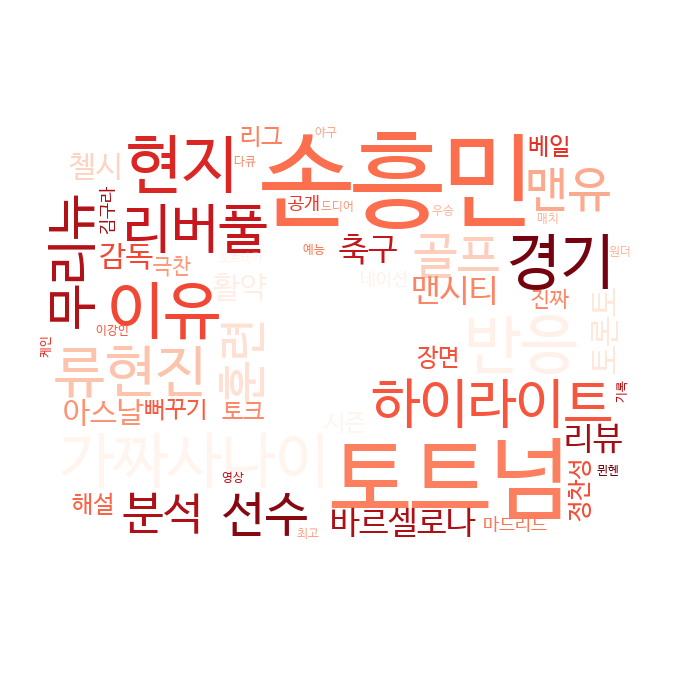

In [233]:
## Sports 2020 트렌드 키워드


#titles을 모두 한 리스트에 담는 과정입니다.
titles=[]

#reset_index를 하는 이유는, for문을 돌리기 위해서입니다!
df_Sports_2020 = df_2020[df_2020['category_name']=='Sports'].reset_index()


for i in range (0,len(df_Sports_2020)):
    titles.append(df_Sports_2020['title'][i]) #요소를 하나하나씩 list에 담습니다!
    
# 뒤에서 진행할 형태소 분석을 위해 리스트를 해제해줍니다!
titles = "".join(titles)

#okt = konlpy.tag.Okt() #형태소 분석기 호출
titles_pos = twitter.pos(titles) #문자열을 형태소 분석기에 넣기

# 보통은 명사, 형용사, 동사가 많은 의미를 담고 있으니
# 명사, 형용사, 동사에 해당하는 word들만 빼내는 과정을 거칩니다.

titles_f = list([word for word, pos in titles_pos if (pos=='Noun')|(pos=='Verb')|(pos=='Adjective')])

#위에를 보니까 정말 많이 등장하지만 별로 필요없는 단어들이 보입니다

#단어가 필요없는 거는 stop_words에 넣어주고, 이미 위에서 한자리단어는 필요없으니 len(word)==1이면 제거해주는 코드를 사용합니다!
stop_words = ['합니다','해주세요','한다','입니다','하는','하니','하면서','이렇게나','있으면','했습니다','봤습니다','까지','어요','다가']
unique_title = set(titles_f) #중복되는 단어들을 없앤 버전이 unique_title입니다.

for word in unique_title:
    if word in stop_words or len(word) == 1:
        while word in titles_f:
            titles_f.remove(word) #stop_words에 해당되거나 한 자리 숫자의 단어를 titles_f에서 제거
            
#Counter 작동! - Counter는 빈도를 세어줍니다.

#빈도 분석을 한 것은 c에 담습니다!
Sports_2020 = Counter(titles_f)


# 드디어 워드클라우드를 생성해보아요!
icon = Image.open('C:/Users/Shon/Desktop/연세대학교/DSL/EDA/youtube-removebg-preview.png')    # 마스크가 될 이미지 불러오기
#plt.imshow(icon)

mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)


wordcloud1 = WordCloud(
    font_path=FONT_PATH,
    background_color='white',                                #사이즈설정
    max_words=200,                                         #단어갯수
    mask=mask,
    colormap="Reds", #킵 autumn
    #background_color="white",
    random_state=1,
    scale=3
)


wordcloud1.generate_from_frequencies(Sports_2020)
wordcloud1.to_image()

#가짜사나이

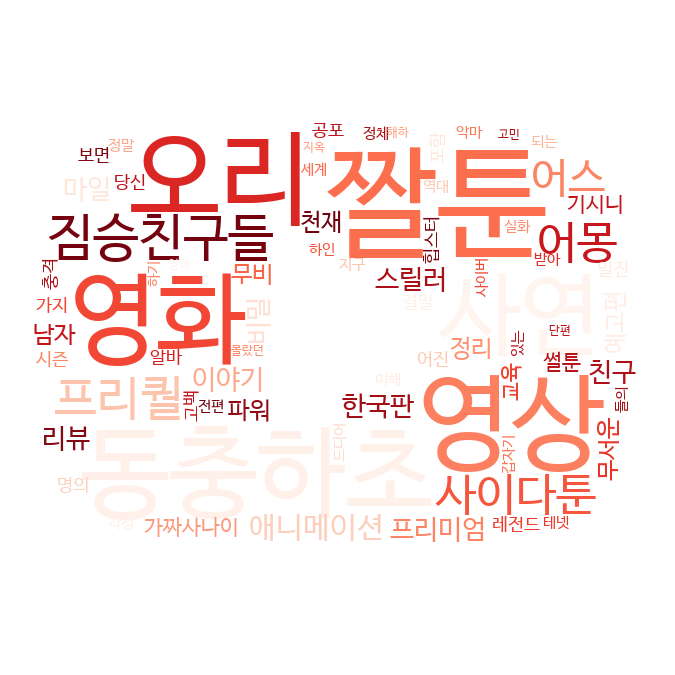

In [234]:
## Film & Animation 2020 트렌드 키워드


#titles을 모두 한 리스트에 담는 과정입니다.
titles=[]

#reset_index를 하는 이유는, for문을 돌리기 위해서입니다!
df_FilmAnimation_2020 = df_2020[df_2020['category_name']=='Film & Animation'].reset_index()


for i in range (0,len(df_FilmAnimation_2020)):
    titles.append(df_FilmAnimation_2020['title'][i]) #요소를 하나하나씩 list에 담습니다!
    
# 뒤에서 진행할 형태소 분석을 위해 리스트를 해제해줍니다!
titles = "".join(titles)

#okt = konlpy.tag.Okt() #형태소 분석기 호출
titles_pos = twitter.pos(titles) #문자열을 형태소 분석기에 넣기

# 보통은 명사, 형용사, 동사가 많은 의미를 담고 있으니
# 명사, 형용사, 동사에 해당하는 word들만 빼내는 과정을 거칩니다.

titles_f = list([word for word, pos in titles_pos if (pos=='Noun')|(pos=='Verb')|(pos=='Adjective')])

#위에를 보니까 정말 많이 등장하지만 별로 필요없는 단어들이 보입니다

#단어가 필요없는 거는 stop_words에 넣어주고, 이미 위에서 한자리단어는 필요없으니 len(word)==1이면 제거해주는 코드를 사용합니다!
stop_words = ['합니다','해주세요','한다','입니다','하는','하니','하면서','이렇게나','있으면','했습니다','봤습니다','까지','어요','다가']
unique_title = set(titles_f) #중복되는 단어들을 없앤 버전이 unique_title입니다.

for word in unique_title:
    if word in stop_words or len(word) == 1:
        while word in titles_f:
            titles_f.remove(word) #stop_words에 해당되거나 한 자리 숫자의 단어를 titles_f에서 제거
            
#Counter 작동! - Counter는 빈도를 세어줍니다.

#빈도 분석을 한 것은 c에 담습니다!
FilmAnimation_2020 = Counter(titles_f)

# 드디어 워드클라우드를 생성해보아요!
icon = Image.open('C:/Users/Shon/Desktop/연세대학교/DSL/EDA/youtube-removebg-preview.png')    # 마스크가 될 이미지 불러오기
#plt.imshow(icon)

mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)


wordcloud1 = WordCloud(
    font_path=FONT_PATH,
    background_color='white',                                #사이즈설정
    max_words=200,                                         #단어갯수
    mask=mask,
    colormap="Reds", #킵 autumn
    #background_color="white",
    random_state=1,
    scale=3
)


wordcloud1.generate_from_frequencies(FilmAnimation_2020)
wordcloud1.to_image()

#짤툰 프리미엄
#기시니 스릴러툰

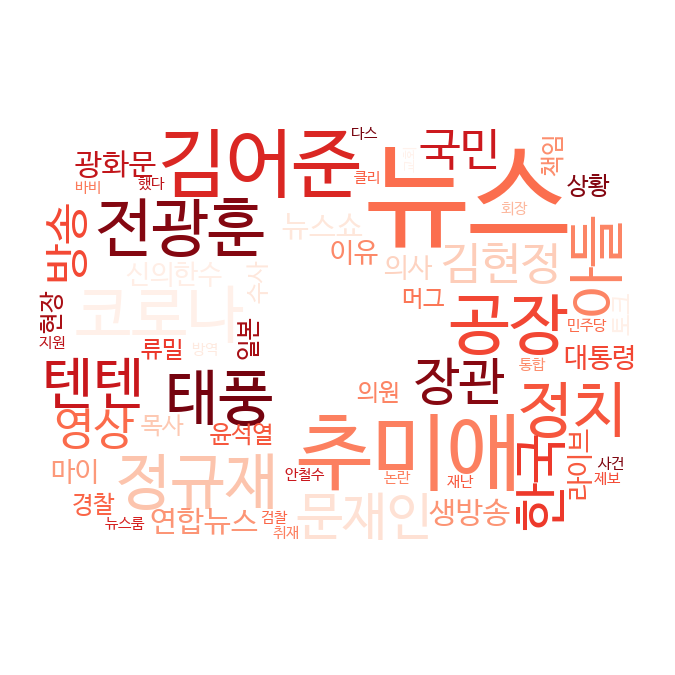

In [235]:
## News & Politics 2020 트렌드 키워드


#titles을 모두 한 리스트에 담는 과정입니다.
titles=[]

#reset_index를 하는 이유는, for문을 돌리기 위해서입니다!
df_NewsPolitics_2020 = df_2020[df_2020['category_name']=='News & Politics'].reset_index()


for i in range (0,len(df_NewsPolitics_2020)):
    titles.append(df_NewsPolitics_2020['title'][i]) #요소를 하나하나씩 list에 담습니다!
    
# 뒤에서 진행할 형태소 분석을 위해 리스트를 해제해줍니다!
titles = "".join(titles)

#okt = konlpy.tag.Okt() #형태소 분석기 호출
titles_pos = twitter.pos(titles) #문자열을 형태소 분석기에 넣기

# 보통은 명사, 형용사, 동사가 많은 의미를 담고 있으니
# 명사, 형용사, 동사에 해당하는 word들만 빼내는 과정을 거칩니다.

titles_f = list([word for word, pos in titles_pos if (pos=='Noun')|(pos=='Verb')|(pos=='Adjective')])

#위에를 보니까 정말 많이 등장하지만 별로 필요없는 단어들이 보입니다

#단어가 필요없는 거는 stop_words에 넣어주고, 이미 위에서 한자리단어는 필요없으니 len(word)==1이면 제거해주는 코드를 사용합니다!
stop_words = ['합니다','해주세요','한다','입니다','하는','하니','하면서','이렇게나','있으면','했습니다','봤습니다','까지','어요','다가']
unique_title = set(titles_f) #중복되는 단어들을 없앤 버전이 unique_title입니다.

for word in unique_title:
    if word in stop_words or len(word) == 1:
        while word in titles_f:
            titles_f.remove(word) #stop_words에 해당되거나 한 자리 숫자의 단어를 titles_f에서 제거
            
#Counter 작동! - Counter는 빈도를 세어줍니다.

#빈도 분석을 한 것은 c에 담습니다!
NewsPolitics_2020 = Counter(titles_f)

# 드디어 워드클라우드를 생성해보아요!
icon = Image.open('C:/Users/Shon/Desktop/연세대학교/DSL/EDA/youtube-removebg-preview.png')    # 마스크가 될 이미지 불러오기
#plt.imshow(icon)

mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)


wordcloud1 = WordCloud(
    font_path=FONT_PATH,
    background_color='white',                                #사이즈설정
    max_words=200,                                         #단어갯수
    mask=mask,
    colormap="Reds", #킵 autumn
    #background_color="white",
    random_state=1,
    scale=3
)


wordcloud1.generate_from_frequencies(NewsPolitics_2020)
wordcloud1.to_image()

#개인 채널이 인기
#코로나